In [13]:
library(fpp2)
library(gridExtra)

In [25]:
# 4. 확률 과정 Z_t = 1 + 0.9 * Z_(t - 1) + ε_t (t = 1, 2, ..., 100) 으로부터 시계열자료를 생성한 후 다음을 수행하라. 단,
# Z_0 = 10의 값을 주고 오차항 ε_t은 WN (white noise) N(0,1)이라고 가정한다. 
set.seed(1)
zt <- ts(numeric(100)) ; zt[1] = 10 ; print(zt)

e <- rnorm(100)
for(t in 2:100){
    zt[t] <- 1 + 0.9 * zt[t - 1] + e[t]
}

print(head(zt, 21))

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1] 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
Time Series:
Start = 1 
End = 21 
Frequency = 1 
 [1] 10.000000 10.183643  9.329650 10.991966 11.222277 10.279581 10.739052
 [8] 11.403472 11.838906 11.349627 12.726445 12.843644 11.938039  9.529535
[15] 10.701513 10.586428 10.511595 11.404271 12.085066 12.470460 13.142392


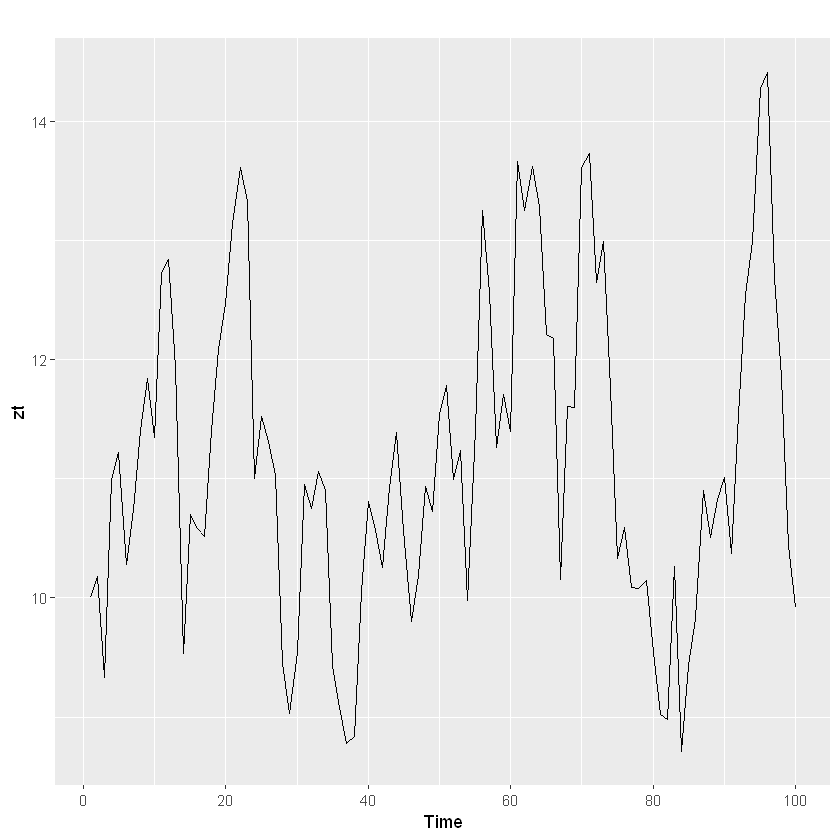

In [15]:
# (a) {Z_t}의 시계열그림을 그려라

autoplot(zt)

In [16]:
# (b) {Z_t}에 대한 표본상관계수(ACF) ρ_k, (k = 0,1, … ,10)를 구하라. 

correlation <- Acf(zt, lag.max = 10, type=c("correlation"), plot = F)
correlation


Autocorrelations of series 'zt', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.754  0.522  0.316  0.175  0.101  0.069  0.090  0.078  0.039 -0.020 

In [17]:
# (c) {Z_t}에 대한 부분표본상관계수(PACF)를 구하라.
partial <- Acf(zt, lag.max = 10, type=c("partial"), plot = F)
partial

Pacf(zt, lag.max = 10, plot = F)


Partial autocorrelations of series 'zt', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.754 -0.107 -0.091 -0.002  0.035  0.019  0.085 -0.063 -0.058 -0.057 


Partial autocorrelations of series 'zt', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.754 -0.107 -0.091 -0.002  0.035  0.019  0.085 -0.063 -0.058 -0.057 

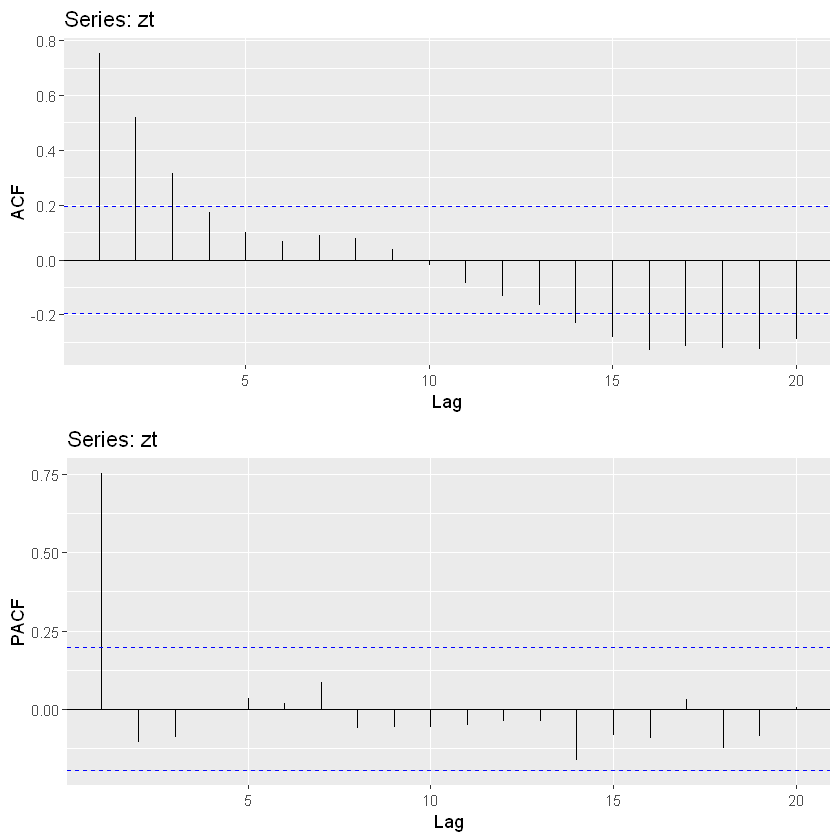

In [18]:
p1 <- ggAcf(zt, type = c("correlation"))
p2 <- ggPacf(zt)
grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2)))

In [26]:
# (d) Z_t, Z_(t - 1) 의 산점도를 그리고, 이 산점도와 ρ1의 관계를 설명하라.

zt_1 <- ts(numeric(99))
for(t in 2:100){
    zt_1[t - 1] <- zt[t]
}

nzt = zt[1:99]
nzt_1 = as.numeric(zt_1)
df_z <- data.frame(nzt, nzt_1)

summary(lm(nzt_1 ~ nzt))
cat("\nρ1 : ", round(correlation$acf[2], 5))


Call:
lm(formula = nzt_1 ~ nzt)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2237 -0.6025  0.0565  0.6315  2.3173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.67887    0.74324   3.604 0.000496 ***
nzt          0.76012    0.06606  11.507  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8841 on 97 degrees of freedom
Multiple R-squared:  0.5772,	Adjusted R-squared:  0.5728 
F-statistic: 132.4 on 1 and 97 DF,  p-value: < 2.2e-16



Call:
lm(formula = nzt ~ nzt_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70598 -0.58652 -0.02618  0.51606  2.28051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.68906    0.74242   3.622 0.000467 ***
nzt_1        0.75933    0.06599  11.507  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8836 on 97 degrees of freedom
Multiple R-squared:  0.5772,	Adjusted R-squared:  0.5728 
F-statistic: 132.4 on 1 and 97 DF,  p-value: < 2.2e-16



ρ1 :  0.75372

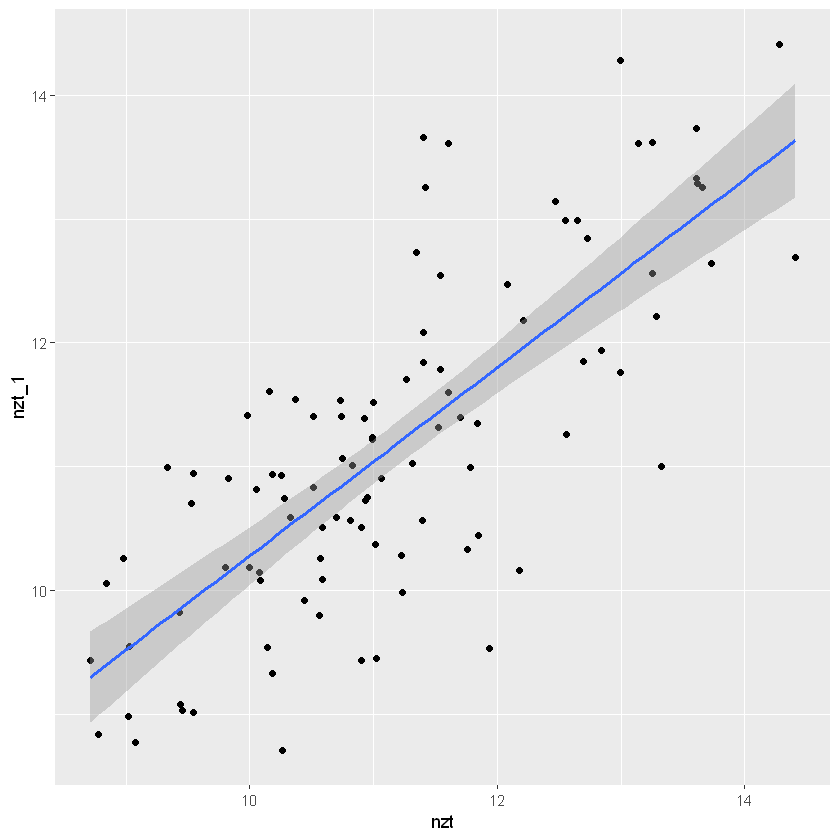

In [20]:
ggplot(df_z, aes(nzt, nzt_1)) + 
    geom_point() +
    stat_smooth(method = lm, level = 0.95)

In [27]:
# (e) Z_t, Z_(t - 2) 의 산점도를 그리고, 이 산점도와 ρ2의 관계를 설명하라.

zt_2 <- ts(numeric(98))
for(t in 3:100){
    zt_2[t - 2] <- zt[t]
}

nzt = zt[1:98]
nzt_2 = as.numeric(zt_2)
df_z <- data.frame(nzt, nzt_2)

summary(lm(nzt_2 ~ nzt))
cat("\nρ2 : ", round(correlation$acf[3], 5))


Call:
lm(formula = nzt_2 ~ nzt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52940 -0.79935 -0.03596  0.80333  2.70622 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.28169    0.97519   5.416  4.5e-07 ***
nzt          0.52767    0.08661   6.093  2.3e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.157 on 96 degrees of freedom
Multiple R-squared:  0.2788,	Adjusted R-squared:  0.2713 
F-statistic: 37.12 on 1 and 96 DF,  p-value: 2.3e-08



Call:
lm(formula = nzt ~ nzt_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2939 -0.7964 -0.1434  0.8350  2.8778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.27036    0.97675   5.396 4.91e-07 ***
nzt_2        0.52844    0.08673   6.093 2.30e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.158 on 96 degrees of freedom
Multiple R-squared:  0.2788,	Adjusted R-squared:  0.2713 
F-statistic: 37.12 on 1 and 96 DF,  p-value: 2.3e-08



ρ2 :  0.52183

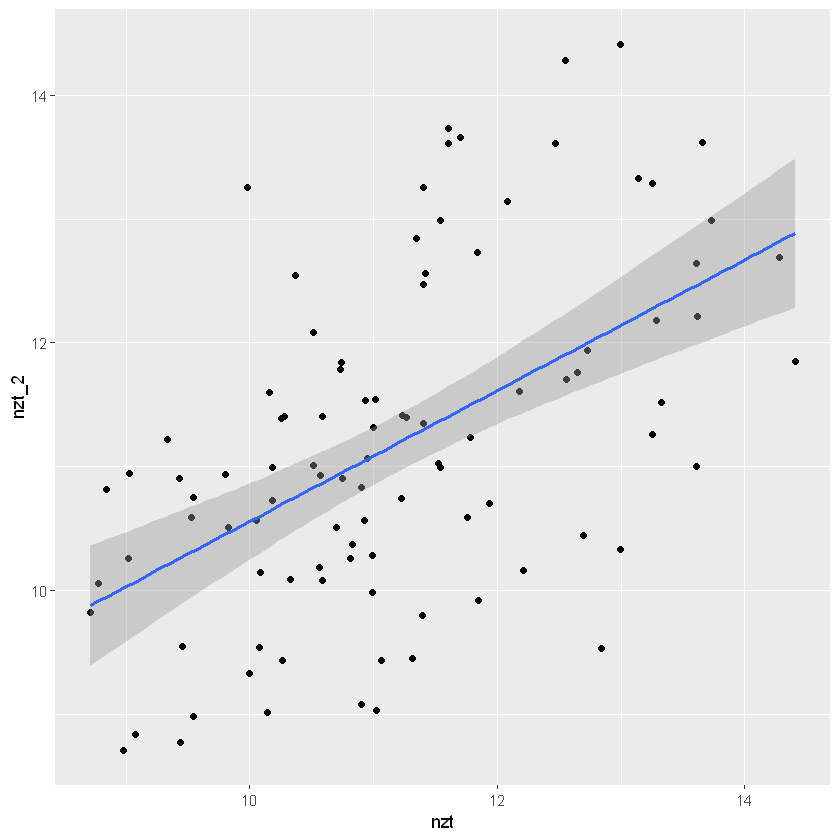

In [22]:
ggplot(df_z, aes(nzt, nzt_2)) + 
    geom_point() +
    stat_smooth(method = lm, level = 0.95)


ρ1 :  0.7537163
ρ2 :  0.5218304

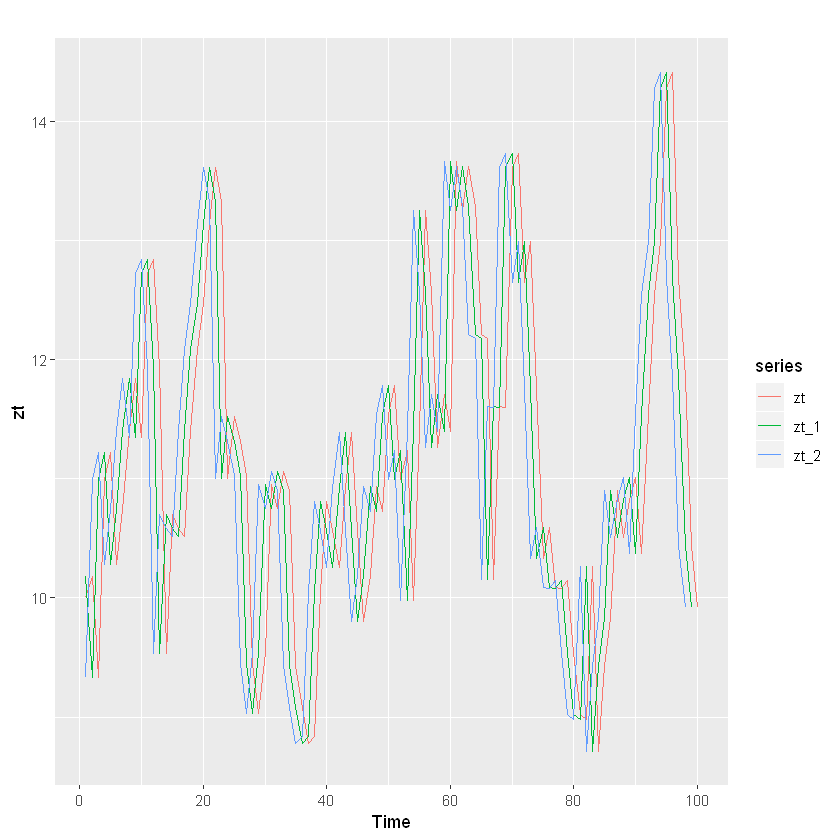

In [23]:
correlation <- Acf(zt, lag.max = 10, type=c("correlation"), plot = F)
cat("\nρ1 : ", correlation$acf[2])
cat("\nρ2 : ", correlation$acf[3])

autoplot(zt, series = 'zt') + autolayer(zt_1) + autolayer(zt_2)